# MUSHROOM CLASSIFICATION - PART III

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Smaller Data

### Loading & Splitting Dataset

In [3]:
data = pd.read_csv('../data/preprocessed_smaller_mushrooms.csv')
data.head()

class  odor  gill-size  gill-color  spore-print-color  population  \
0      1     6          1           4                  2           3   
1      0     0          0           4                  3           2   
2      0     3          0           5                  3           2   
3      1     6          1           5                  2           3   
4      0     5          0           4                  3           0   

   stalk-surface-above-ring  
0                         2  
1                         2  
2                         2  
3                         2  
4                         2

In [4]:
X = data.iloc[:,1:]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [5]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [6]:
lr_pred = lr.predict(X_test)
print("Accuracy of Logistic Regression Model:", accuracy_score(y_test, lr_pred))
print("Precision of Logistic Regression Model:", precision_score(y_test, lr_pred))
print("Recall of Logistic Regression Model:", recall_score(y_test, lr_pred))
print("F1 Score of Logistic Regression Model:", f1_score(y_test, lr_pred))

Accuracy of Logistic Regression Model: 0.8916923076923077
Precision of Logistic Regression Model: 0.8668280871670703
Recall of Logistic Regression Model: 0.9156010230179028
F1 Score of Logistic Regression Model: 0.8905472636815921


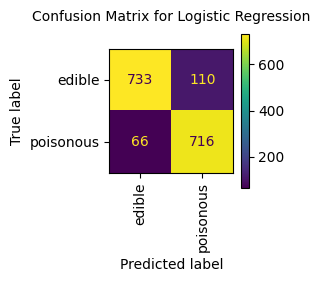

In [7]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Logistic Regression",fontsize=10, pad=20)
plt.show()

#### Hyperparameter Tuning

In [8]:
param_grid = {
    'max_iter': [50, 100, 150, 200, 250, 500, 1000, 2000, 5000, 10000, 100000]
}
gs = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'max_iter': [50, 100, 150, 200, 250, 500, 1000, 2000,
                                      5000, 10000, 100000]},
             scoring='accuracy')

In [9]:
print("Best cross-validation score after hyperparameter tuning of Logistic Regression:", gs.best_score_)
print("Best parameters for Logistic Regression:", gs.best_params_)
best_lr = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Logistic Regression: 0.9012165571149406
Best parameters for Logistic Regression: {'max_iter': 50}


In [10]:
best_lr_pred = best_lr.predict(X_test)
print("Accuracy of Best Logistic Regressor:", accuracy_score(y_test, best_lr_pred))
print("Precision of Best Logistic Regressor:", precision_score(y_test, best_lr_pred))
print("Recall of Best Logistic Regressor:", recall_score(y_test, best_lr_pred))
print("F1 Score of Best Logistic Regressor:", f1_score(y_test, best_lr_pred))

Accuracy of Best Logistic Regressor: 0.8916923076923077
Precision of Best Logistic Regressor: 0.8668280871670703
Recall of Best Logistic Regressor: 0.9156010230179028
F1 Score of Best Logistic Regressor: 0.8905472636815921


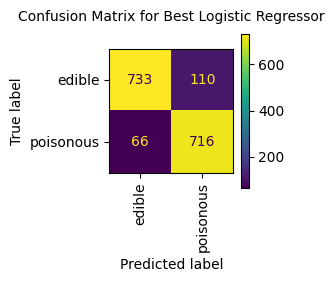

In [11]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_lr_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Logistic Regressor",fontsize=10, pad=20)
plt.show()

### Softmax Regression

In [12]:
sm = LogisticRegression(multi_class='multinomial', random_state=42)
sm.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [13]:
sm_pred = sm.predict(X_test)
print("Accuracy of Softmax Regression Model:", accuracy_score(y_test, sm_pred))
print("Precision of Softmax Regression Model:", precision_score(y_test, sm_pred))
print("Recall of Softmax Regression Model:", recall_score(y_test, sm_pred))
print("F1 Score of Softmax Regression Model:", f1_score(y_test, sm_pred))

Accuracy of Softmax Regression Model: 0.896
Precision of Softmax Regression Model: 0.8679471788715486
Recall of Softmax Regression Model: 0.9245524296675192
F1 Score of Softmax Regression Model: 0.8953560371517028


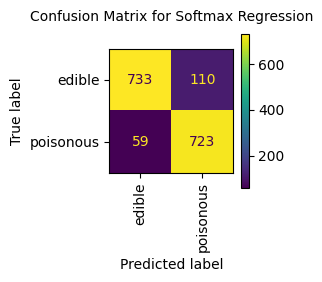

In [14]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, sm_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Softmax Regression",fontsize=10, pad=20)
plt.show()

#### Hyperparameter Tuning

In [15]:
param_grid = {
    'max_iter': [50, 100, 150, 200, 250, 500, 1000, 2000, 5000, 10000, 100000]
}
gs = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', random_state=42), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'max_iter': [50, 100, 150, 200, 250, 500, 1000, 2000,
                                      5000, 10000, 100000]},
             scoring='accuracy')

In [16]:
print("Best cross-validation score after hyperparameter tuning of Softmax Regression:", gs.best_score_)
print("Best parameters for Softmax Regression:", gs.best_params_)
best_sm = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Softmax Regression: 0.9012165571149406
Best parameters for Softmax Regression: {'max_iter': 50}


In [17]:
best_sm_pred = best_sm.predict(X_test)
print("Accuracy of Best Softmax Regressor:", accuracy_score(y_test, best_sm_pred))
print("Precision of Best Softmax Regressor:", precision_score(y_test, best_sm_pred))
print("Recall of Best Softmax Regressor:", recall_score(y_test, best_sm_pred))
print("F1 Score of Best Softmax Regressor:", f1_score(y_test, best_sm_pred))

Accuracy of Best Softmax Regressor: 0.896
Precision of Best Softmax Regressor: 0.8679471788715486
Recall of Best Softmax Regressor: 0.9245524296675192
F1 Score of Best Softmax Regressor: 0.8953560371517028


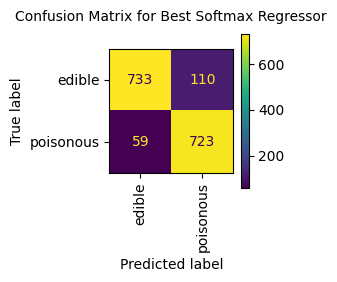

In [18]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_sm_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Softmax Regressor",fontsize=10, pad=20)
plt.show()

### Decision Tree Classifier

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
dt_pred = dt.predict(X_test)
print("Accuracy of Decision Tree Classifier:", accuracy_score(y_test, dt_pred))
print("Precision of Decision Tree Classifier:", precision_score(y_test, dt_pred))
print("Recall of Decision Tree Classifier:", recall_score(y_test, dt_pred))
print("F1 Score of Decision Tree Classifier:", f1_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier: 1.0
Precision of Decision Tree Classifier: 1.0
Recall of Decision Tree Classifier: 1.0
F1 Score of Decision Tree Classifier: 1.0


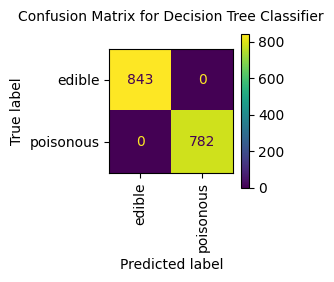

In [8]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize=10, pad=20)
plt.show()

In [9]:
plt.figure(figsize=(100,50), dpi=150)
plot_tree(dt)
# plt.savefig("smaller_decision_tree.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

#### Hyperparameter Tuning

In [10]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [5, 10, 15, 25, 50, 60, 75, 80, 90]
}
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 15, 25, 50, 60, 75, 80,
                                              90]},
             scoring='accuracy')

In [11]:
print("Best cross-validation score after hyperparameter tuning of Decision Tree:", gs.best_score_)
print("Best parameters for Decision Tree:", gs.best_params_)
best_dt = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Decision Tree: 0.9995381062355658
Best parameters for Decision Tree: {'max_depth': 8, 'min_samples_leaf': 5}


In [12]:
best_dt_pred = best_dt.predict(X_test)
print("Accuracy of Best Decision Tree Classifier:", accuracy_score(y_test, best_dt_pred))
print("Precision of Best Decision Tree Classifier:", precision_score(y_test, best_dt_pred))
print("Recall of Best Decision Tree Classifier:", recall_score(y_test, best_dt_pred))
print("F1 Score of Best Decision Tree Classifier:", f1_score(y_test, best_dt_pred))

Accuracy of Best Decision Tree Classifier: 1.0
Precision of Best Decision Tree Classifier: 1.0
Recall of Best Decision Tree Classifier: 1.0
F1 Score of Best Decision Tree Classifier: 1.0


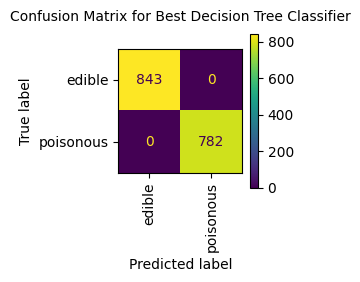

In [13]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_dt_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Decision Tree Classifier",fontsize=10, pad=20)
plt.show()

In [14]:
plt.figure(figsize=(100,50), dpi=150)
plot_tree(best_dt)
# plt.savefig("best_smaller_decision_tree.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

* Maximum depth of 8 and minimum of 5 samples per leaf only would give us 100% accuracy, precision, and recall.

In [16]:
joblib.dump(best_dt, '../model/decision_tree.pkl')

['../model/decision_tree.pkl']

### Bagging Classifier

In [96]:
bg = BaggingClassifier(random_state=42)
gs = GridSearchCV(estimator=bg, param_grid={'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250, 500, 1000]}, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250,
                                          500, 1000]},
             scoring='accuracy')

In [97]:
print("Best cross-validation score after hyperparameter tuning of Bagging Classifier:", gs.best_score_)
print("Best parameters for Bagging Classifier:", gs.best_params_)
best_bg = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Bagging Classifier: 1.0
Best parameters for Bagging Classifier: {'n_estimators': 10}


In [98]:
best_bg_pred = best_bg.predict(X_test)
print("Accuracy of Best Bagging Classifier:", accuracy_score(y_test, best_bg_pred))
print("Precision of Best Bagging Classifier:", precision_score(y_test, best_bg_pred))
print("Recall of Best Bagging Classifier:", recall_score(y_test, best_bg_pred))
print("F1 Score of Best Bagging Classifier:", f1_score(y_test, best_bg_pred))

Accuracy of Best Bagging Classifier: 1.0
Precision of Best Bagging Classifier: 1.0
Recall of Best Bagging Classifier: 1.0
F1 Score of Best Bagging Classifier: 1.0


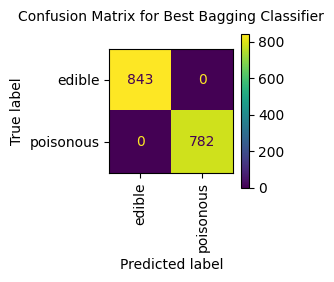

In [99]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_bg_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Bagging Classifier",fontsize=10, pad=20)
plt.show()

### Pasting Classifier

In [100]:
pst = BaggingClassifier(random_state=42, bootstrap=False)
gs = GridSearchCV(estimator=pst, param_grid={'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250, 500, 1000]}, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(bootstrap=False, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250,
                                          500, 1000]},
             scoring='accuracy')

In [101]:
print("Best cross-validation score after hyperparameter tuning of Pasting Classifier:", gs.best_score_)
print("Best parameters for Pasting Classifier:", gs.best_params_)
best_pst = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Pasting Classifier: 1.0
Best parameters for Pasting Classifier: {'n_estimators': 10}


In [102]:
best_pst_pred = best_pst.predict(X_test)
print("Accuracy of Best Pasting Classifier:", accuracy_score(y_test, best_pst_pred))
print("Precision of Best Pasting Classifier:", precision_score(y_test, best_pst_pred))
print("Recall of Best Pasting Classifier:", recall_score(y_test, best_pst_pred))
print("F1 Score of Best Pasting Classifier:", f1_score(y_test, best_pst_pred))

Accuracy of Best Pasting Classifier: 1.0
Precision of Best Pasting Classifier: 1.0
Recall of Best Pasting Classifier: 1.0
F1 Score of Best Pasting Classifier: 1.0


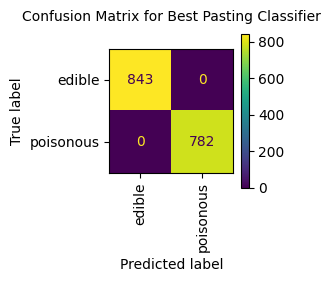

In [103]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_pst_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Pasting Classifier",fontsize=10, pad=20)
plt.show()

### Random Forest Classifier

In [104]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100, 200],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 25, 50, 60, 75, 80, 90]
}
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 25, 50, 60, 75, 80,
                                              90],
                         'n_estimators': [10, 25, 50, 75, 100, 200]},
             scoring='accuracy')

In [105]:
print("Best cross-validation score after hyperparameter tuning of Random Forest:", gs.best_score_)
print("Best parameters for Random Forest:", gs.best_params_)
best_rf = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Random Forest: 1.0
Best parameters for Random Forest: {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 25}


In [106]:
best_rf_pred = best_rf.predict(X_test)
print("Accuracy of Best Random Forest Classifier:", accuracy_score(y_test, best_rf_pred))
print("Precision of Best Random Forest Classifier:", precision_score(y_test, best_rf_pred))
print("Recall of Best Random Forest Classifier:", recall_score(y_test, best_rf_pred))
print("F1 Score of Best Random Forest Classifier:", f1_score(y_test, best_rf_pred))

Accuracy of Best Random Forest Classifier: 1.0
Precision of Best Random Forest Classifier: 1.0
Recall of Best Random Forest Classifier: 1.0
F1 Score of Best Random Forest Classifier: 1.0


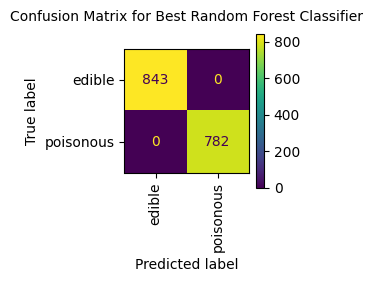

In [107]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_rf_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Random Forest Classifier",fontsize=10, pad=20)
plt.show()

### AdaBoost Classifier

In [108]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100, 200],
    'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]
}
gs = GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), algorithm='SAMME', random_state=42), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15,
                                                  20],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5,
                                           0.75, 1.0],
                         'n_estimators': [10, 25, 50, 75, 100, 200]},
             scoring='accuracy')

In [109]:
print("Best cross-validation score after hyperparameter tuning of AdaBoost Classifier:", gs.best_score_)
print("Best parameters for AdaBoost Classifier:", gs.best_params_)
best_ab = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of AdaBoost Classifier: 1.0
Best parameters for AdaBoost Classifier: {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 200}


In [110]:
best_ab_pred = best_ab.predict(X_test)
print("Accuracy of Best AdaBoost Classifier:", accuracy_score(y_test, best_ab_pred))
print("Precision of Best AdaBoost Classifier:", precision_score(y_test, best_ab_pred))
print("Recall of Best AdaBoost Classifier:", recall_score(y_test, best_ab_pred))
print("F1 Score of Best AdaBoost Classifier:", f1_score(y_test, best_ab_pred))

Accuracy of Best AdaBoost Classifier: 1.0
Precision of Best AdaBoost Classifier: 1.0
Recall of Best AdaBoost Classifier: 1.0
F1 Score of Best AdaBoost Classifier: 1.0


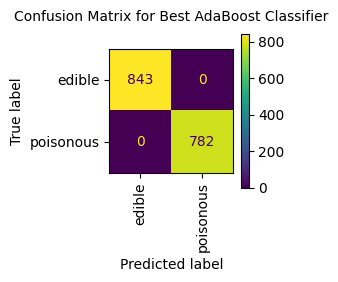

In [111]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_ab_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best AdaBoost Classifier",fontsize=10, pad=20)
plt.show()

### Gradient Boosting Classifier

In [112]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100, 200],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]
}
gs = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5,
                                           0.75, 1.0],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
                         'n_estimators': [10, 25, 50, 75, 100, 200]},
             scoring='accuracy')

In [113]:
print("Best cross-validation score after hyperparameter tuning of Gradient Boosting:", gs.best_score_)
print("Best parameters for Gradient Boosting:", gs.best_params_)
best_gb = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Gradient Boosting: 1.0
Best parameters for Gradient Boosting: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 50}


In [114]:
best_gb_pred = best_gb.predict(X_test)
print("Accuracy of Best Gradient Boosting:", accuracy_score(y_test, best_gb_pred))
print("Precision of Best Gradient Boosting:", precision_score(y_test, best_gb_pred))
print("Recall of Best Gradient Boosting:", recall_score(y_test, best_gb_pred))
print("F1 Score of Best Gradient Boosting:", f1_score(y_test, best_gb_pred))

Accuracy of Best Gradient Boosting: 1.0
Precision of Best Gradient Boosting: 1.0
Recall of Best Gradient Boosting: 1.0
F1 Score of Best Gradient Boosting: 1.0


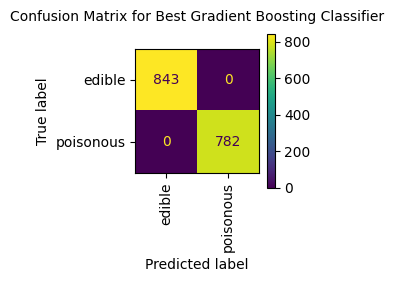

In [115]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_gb_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Gradient Boosting Classifier",fontsize=10, pad=20)
plt.show()

### Hard Voting Classifier

In [28]:
estimators = [
    ('lr', LogisticRegression(max_iter=50, random_state=42)),
    ('sm', LogisticRegression(multi_class='multinomial', max_iter=50, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42))
]
hv = VotingClassifier(estimators=estimators, voting='hard')
hv.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=50, random_state=42)),
                             ('sm',
                              LogisticRegression(max_iter=50,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=5,
                                                     random_state=42))])

In [29]:
hv_pred = hv.predict(X_test)
print("Accuracy of Hard Voting:", accuracy_score(y_test, hv_pred))
print("Precision of Hard Voting:", precision_score(y_test, hv_pred))
print("Recall of Hard Voting:", recall_score(y_test, hv_pred))
print("F1 Score of Hard Voting:", f1_score(y_test, hv_pred))

Accuracy of Hard Voting: 0.896
Precision of Hard Voting: 0.8679471788715486
Recall of Hard Voting: 0.9245524296675192
F1 Score of Hard Voting: 0.8953560371517028


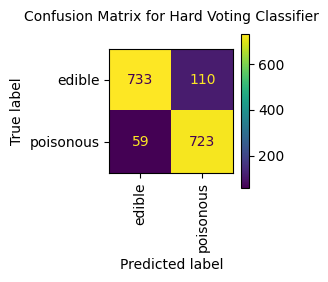

In [30]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, hv_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Hard Voting Classifier",fontsize=10, pad=20)
plt.show()

### Soft Voting Classifier

In [31]:
estimators = [
    ('lr', LogisticRegression(max_iter=50, random_state=42)),
    ('sm', LogisticRegression(multi_class='multinomial', max_iter=50, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42))
]
sv = VotingClassifier(estimators=estimators, voting='soft')
sv.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=50, random_state=42)),
                             ('sm',
                              LogisticRegression(max_iter=50,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=5,
                                                     random_state=42))],
                 voting='soft')

In [32]:
sv_pred = sv.predict(X_test)
print("Accuracy of Soft Voting:", accuracy_score(y_test, sv_pred))
print("Precision of Soft Voting:", precision_score(y_test, sv_pred))
print("Recall of Soft Voting:", recall_score(y_test, sv_pred))
print("F1 Score of Soft Voting:", f1_score(y_test, sv_pred))

Accuracy of Soft Voting: 0.9384615384615385
Precision of Soft Voting: 0.9220297029702971
Recall of Soft Voting: 0.9526854219948849
F1 Score of Soft Voting: 0.9371069182389937


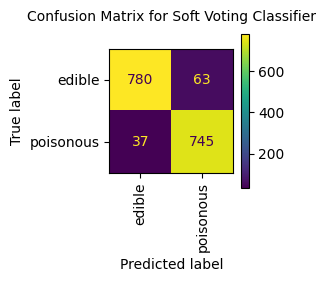

In [33]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, sv_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Soft Voting Classifier",fontsize=10, pad=20)
plt.show()

### Stacking Classifier

#### Logistic Regression & Decision Tree

In [31]:
estimators1 = [('lr', best_lr), ('dt', best_dt)]
stack = StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression(random_state=42), passthrough=True)
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=50,
                                                   random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_leaf=5,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(random_state=42),
                   passthrough=True)

In [32]:
stack_pred = stack.predict(X_test)
print("Accuracy of Stacking:", accuracy_score(y_test, stack_pred))
print("Precision of Stacking:", precision_score(y_test, stack_pred))
print("Recall of Stacking:", recall_score(y_test, stack_pred))
print("F1 Score of Stacking:", f1_score(y_test, stack_pred))

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1 Score of Stacking: 1.0


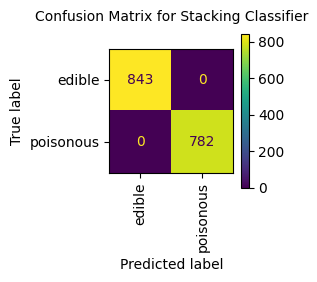

In [33]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, stack_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Stacking Classifier",fontsize=10, pad=20)
plt.show()

#### Softmax Regression & Decision Tree

In [34]:
estimators2 = [('sm', best_sm), ('dt', best_dt)]
stack = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression(random_state=42), passthrough=True)
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('sm',
                                LogisticRegression(max_iter=50,
                                                   multi_class='multinomial',
                                                   random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_leaf=5,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(random_state=42),
                   passthrough=True)

In [35]:
stack_pred = stack.predict(X_test)
print("Accuracy of Stacking:", accuracy_score(y_test, stack_pred))
print("Precision of Stacking:", precision_score(y_test, stack_pred))
print("Recall of Stacking:", recall_score(y_test, stack_pred))
print("F1 Score of Stacking:", f1_score(y_test, stack_pred))

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1 Score of Stacking: 1.0


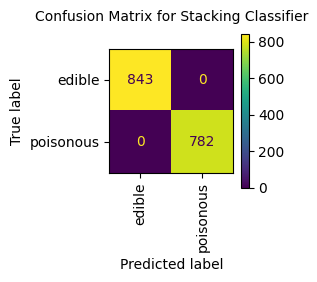

In [36]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, stack_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Stacking Classifier",fontsize=10, pad=20)
plt.show()

### SVM

#### Linear Kernel

In [128]:
lsvc = SVC(kernel='linear', random_state=42)
lsvc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [129]:
lsvc_pred = lsvc.predict(X_test)
print("Accuracy of Linear Kernel SVC:", accuracy_score(y_test, lsvc_pred))
print("Precision of Linear Kernel SVC:", precision_score(y_test, lsvc_pred))
print("Recall of Linear Kernel SVC:", recall_score(y_test, lsvc_pred))
print("F1 Score of Linear Kernel SVC:", f1_score(y_test, lsvc_pred))

Accuracy of Linear Kernel SVC: 0.9046153846153846
Precision of Linear Kernel SVC: 0.8727705112960761
Recall of Linear Kernel SVC: 0.9386189258312021
F1 Score of Linear Kernel SVC: 0.904497843499692


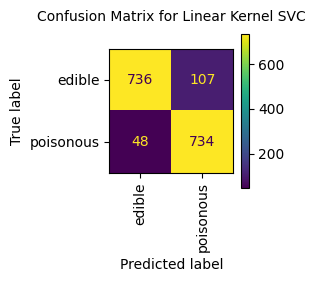

In [130]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, lsvc_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Linear Kernel SVC",fontsize=10, pad=20)
plt.show()

#### Polynomial Kernel

In [131]:
psvc = SVC(kernel='poly', random_state=42)
param_grid = {
    'degree': [1, 2, 3, 5, 10],
    'coef0': [-50, -25, -10, -1, 0, 1, 10, 25, 50]
}
gs = GridSearchCV(estimator=psvc, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'coef0': [-50, -25, -10, -1, 0, 1, 10, 25, 50],
                         'degree': [1, 2, 3, 5, 10]},
             scoring='accuracy')

In [132]:
print("Best cross-validation score after hyperparameter tuning of Polynomial Kernel SVC:", gs.best_score_)
print("Best parameters for Polynomial Kernel SVC:", gs.best_params_)
best_psvc = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of Polynomial Kernel SVC: 1.0
Best parameters for Polynomial Kernel SVC: {'coef0': 1, 'degree': 5}


In [133]:
best_psvc_pred = best_psvc.predict(X_test)
print("Accuracy of Best Polynomial Kernel SVC:", accuracy_score(y_test, best_psvc_pred))
print("Precision of Best Polynomial Kernel SVC:", precision_score(y_test, best_psvc_pred))
print("Recall of Best Polynomial Kernel SVC:", recall_score(y_test, best_psvc_pred))
print("F1 Score of Best Polynomial Kernel SVC:", f1_score(y_test, best_psvc_pred))

Accuracy of Best Polynomial Kernel SVC: 1.0
Precision of Best Polynomial Kernel SVC: 1.0
Recall of Best Polynomial Kernel SVC: 1.0
F1 Score of Best Polynomial Kernel SVC: 1.0


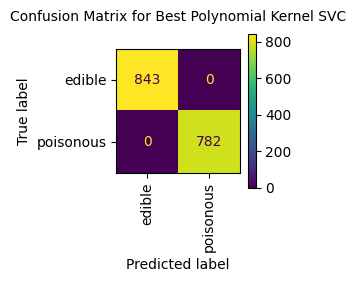

In [134]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_psvc_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best Polynomial Kernel SVC",fontsize=10, pad=20)
plt.show()

#### RBF Kernel

In [135]:
rbf_svc = SVC(kernel='rbf', random_state=42)
param_grid = {
    'gamma': [1, 5, 10, 20, 25, 50, 75, 100, 200, 500, 1000]
}
gs = GridSearchCV(estimator=rbf_svc, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [1, 5, 10, 20, 25, 50, 75, 100, 200, 500,
                                   1000]},
             scoring='accuracy')

In [136]:
print("Best cross-validation score after hyperparameter tuning of RBF Kernel SVC:", gs.best_score_)
print("Best parameters for RBF Kernel SVC:", gs.best_params_)
best_rbf_svc = gs.best_estimator_

Best cross-validation score after hyperparameter tuning of RBF Kernel SVC: 1.0
Best parameters for RBF Kernel SVC: {'gamma': 1}


In [137]:
best_rbf_svc_pred = best_rbf_svc.predict(X_test)
print("Accuracy of Best RBF Kernel SVC:", accuracy_score(y_test, best_rbf_svc_pred))
print("Precision of Best RBF Kernel SVC:", precision_score(y_test, best_rbf_svc_pred))
print("Recall of Best RBF Kernel SVC:", recall_score(y_test, best_rbf_svc_pred))
print("F1 Score of Best RBF Kernel SVC:", f1_score(y_test, best_rbf_svc_pred))

Accuracy of Best RBF Kernel SVC: 1.0
Precision of Best RBF Kernel SVC: 1.0
Recall of Best RBF Kernel SVC: 1.0
F1 Score of Best RBF Kernel SVC: 1.0


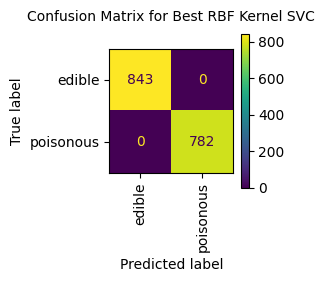

In [138]:
fig, ax = plt.subplots(figsize=(2,2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_rbf_svc_pred, ax=ax, display_labels=['edible','poisonous'], xticks_rotation='vertical')
plt.title("Confusion Matrix for Best RBF Kernel SVC",fontsize=10, pad=20)
plt.show()